# Statistical Analysis of Correlation in the NBA

## Introduction

By: Michael Gary
Date: 9/27/17 - 10/5/17  

*Please run the graphs twice if they appear inaccurate*

In this lab, I am going to be investigating correlations between multiple variables in NBA statistics. 
The data set I've been given includes the probability that various teams will win at certain times in a game. 
I will be comparing all quantitative variables to the anchor variable for correlation using the correlation coefficient (r), scatter plots, and graphing relationships that I discover. 

Through this analysis, I hope to answer 3 questions:
    1. How are variables related to one another? 
    2. Do some variables correlate?
    3. What conclusions can be drawn based on correlations? 


## About the Data Set

This NBA data set was retrieved from an article on Nate Silver's "538" statistics website titled *"Every NBA Team’s Chance Of Winning In Every Minute Across Every Game"* by Mike Beuoy and Allison McCann (Dated February 18, 2015).

## Preparing the Data

In [7]:
# the data that I want to extract from the file is the probability of the top 8 and bottom 8 teams of winning in the 48th minute
# from this anchor variable, I'm going graph 3 relationships
# to process the data I'm going to use the pandas package
import pandas as pd
# finished importing pandas as pd
nba_data = pd.read_csv("NBA_stats/nba.csv")
# using pandas to process the csv file
minute_48 = nba_data['48']
# selecting column 48 for the 48th minute probability of a team winning
# now I need to choose the specific values of the top and bottom 8 teams
# the values from the 48th column that I need are #s (top 8) 9,0,10,4,14,26,5,24 AND (bott 8) 8,7,25,21,13,17,19,22
del minute_48[1];
del minute_48[2];
del minute_48[3];
del minute_48[6];
del minute_48[11];
del minute_48[12];
del minute_48[15];
del minute_48[16];
del minute_48[18];
del minute_48[20];
del minute_48[23];
del minute_48[27];
del minute_48[28];
del minute_48[29];
# in order to have only the values that I have selected, I deleted every other value that I do not need
print(minute_48)
# this yields my new list which has the Y values for my upcoming graphs
# edit: this a learning moment!! matplotlib cannot use variables for X and Y values
# therefore this list is unnecessary
# I will have to copy these values into the Y list instead of typing "minute_48"
# at least I know how to use pandas!

0     0.80556
4     0.63889
5     0.59091
7     0.39623
8     0.39815
9     0.82000
10    0.63462
13    0.24528
14    0.70755
17    0.22642
19    0.22115
21    0.28571
22    0.22642
24    0.65385
25    0.33654
26    0.66981
Name: 48, dtype: float64


# Number of Wins vs Chance of Winning in the 48th Minute

The first statistical analysis piece of this lab will include the anchor variable (chance of winning in 48th minute) and the number of wins the top 8 and bottom 8 teams had in the 2014-2015 NBA season.

## Preparing and Modeling Data

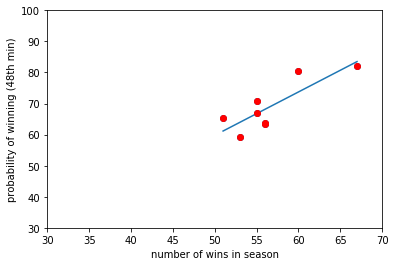

best fit line:
y = -10.06 + 1.40x


0.83268535386301468

In [13]:
# first, I am going to input the number of wins the top and bottom 8 teams of the NBA had in 2014-2015
# I am going to create variables for each team, and I assign that variable the number of wins the team had
# top 8 teams
war = 67
hawk = 60
rock = 56
clip = 56
griz = 55
spur = 55
cavs = 53
blaz = 51
# bottom 8 teams
pist = 32
nugg = 30
king = 29
mag = 25
lake = 21
phil = 18
knic = 17
timb = 16
# these values will be along the x-axis
import matplotlib.pyplot as plt
# now I have imported the python function called matplotlib
# in this bracket, I will have my coordinates
plt.plot([67,60,56,56,55,55,53,51], [82,80.556,63.462,63.889,70.755,66.981,59.091,65.385], 'ro')
# the first list includes the Xs and the second has the Ys
X_big = [67,60,56,56,55,55,53,51]
Y_big = [82,80.556,63.462,63.889,70.755,66.981,59.091,65.385]
plt.axis([30, 70, 30, 100])
# this is my graphs scale (it is slightly unusual but it fits the data well)
plt.ylabel('probability of winning (48th min)')
plt.xlabel('number of wins in season')
# labels for the axes
plt.show()
# now I want to find the line of regression and plot it
def best_fit(X_big, Y_big):

    xbar = sum(X_big)/len(X_big)
    ybar = sum(Y_big)/len(Y_big)
    n = len(X_big) # or len(Y_big)

    numer = sum([xi*yi for xi,yi in zip(X_big, Y_big)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X_big]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X_big, Y_big)

# plot points and fit line
plt.scatter(X_big, Y_big)
yfit = [a + b * xi for xi in X_big]
plt.plot(X_big, yfit)
# now I need to find the correlation coefficient to see the strength of the line of best fit
import numpy as np
# importing the numpy program
np.corrcoef(X_big, Y_big)[0, 1]
# 0-1 is the range that r can lie in
# r can be positive or negative but the relationships I'm plotting are all positive

## Analysis

The graph of the relationship between a team's number of wins (X values) and the chance of a team winning in the 48th minute (Y values) for the top 8 teams in the NBA is very clean. The points follow a positive and linear trend. The correlation coefficient which measures how well data fits the line of best-fit is equal to 0.833. This value is fairly strong in terms of statistical analysis. By looking at the graph of the points, it is pretty clear that the relationship is linear. Therefore, I used the right regression model. The only reason I can visually see as to why r is not closer to 1, is the point (60,80.556). The y-value is rather high in terms of the given x-value. If that point were removed, the line of best-fit might be more accurate and r would probably be closer to 1. 

In terms of what can be concluded:
- The more wins a team had, the higher probability of winning in the 48th minute
- The correlation between these two values is fairly strong, positive, and linear
- Conjecture: The 48th minute is the most important minute of the game. The success of a team in the 48th minute will indicate the success of a season

I just plotted the relationship between the number of wins a team has versus the chance of a team winning in the 48th minute for the top 8 teams. Now I am going to do the same for the bottom 8 teams in the league. Will the correlation be as strong or stronger than the correlation found in the first graph?

## Preparing and Modeling Data Part 2

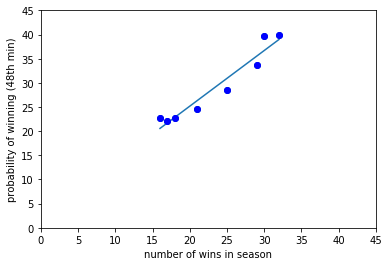

best fit line:
y = 2.16 + 1.15x


0.96673035626097881

In [51]:
import matplotlib.pyplot as plt
# I will nw do the same thing that I did for the top 8 teams
# lists for X and Y coordinates
X = [32,30,29,25,21,18,17,16]
Y = [39.815,39.623,33.654,28.571,24.528,22.642,22.115,22.642]
# bo stands for blue circle points on the graph
plt.plot([32,30,29,25,21,18,17,16], [39.815,39.623,33.654,28.571,24.528,22.642,22.115,22.642], 'bo')
plt.axis([0, 45, 0, 45])
plt.ylabel('probability of winning (48th min)')
plt.xlabel('number of wins in season')
# labels for the axes
plt.show()
# finding the line of regression and plotting it
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)

# plot points and fit line
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# finding the correlation coefficient (r) to see how well the line fits the data
import numpy as np
# importing the numpy program
np.corrcoef(X, Y)[0, 1]
# 0-1 is the range that r can lie in
# r can be positive or negative but the relationships I'm plotting are all positive

## Analysis

The graph of the relationship between a team's number of wins (X values) and the chance of a team winning in the 48th minute (Y values) for the worst 8 teams in the NBA is almost perfect. The points follow a positive and linear trend. The correlation coefficient which measures how well data fits the line of best-fit is equal to 0.9667. This value is extremely strong and shows a very clear correlation. The correlation for these 8 teams is stronger than the correlation for the top 8 teams. This does not necessarily mean anything but it is an observation.

In terms of what can be concluded (same as the previous graph):
- The more wins a team had, the higher probability of winning in the 48th minute
- The correlation between these two values is extremely strong, positive, and linear
- Conjecture: The 48th minute is the most important minute of the game. The success of a team in the 48th minute will indicate the success of a season

Now I want to see the correlation between the number of shots a team takes versus the team's chance of winning in the 48th minute (anchor variable). To accomplish this task, I am going to take the same 16 teams and use their data. 

## Preparing and Modeling Data Part 3

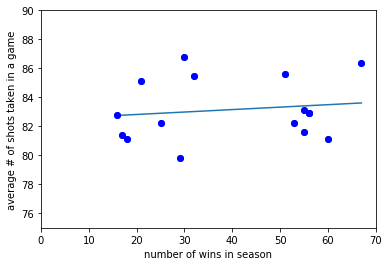

best fit line:
y = 82.48 + 0.02x


0.14440081313374434

In [15]:
import matplotlib.pyplot as plt
# I will nw do the same thing that I did for the top 8 teams
# lists for X and Y coordinates
X_shot = [67,60,56,56,55,55,53,51,32,30,29,25,21,18,17,16]
Y_shot = [86.4,81.1,82.9,82.9,81.6,83.1,82.2,85.6,85.5,86.8,79.8,82.2,85.1,81.1,81.4,82.8]
# bo stands for blue circle points on the graph
plt.plot([67,60,56,56,55,55,53,51,32,30,29,25,21,18,17,16], [86.4,81.1,82.9,82.9,81.6,83.1,82.2,85.6,85.5,86.8,79.8,82.2,85.1,81.1,81.4,82.8], 'bo')
plt.axis([0, 70, 75, 90])
plt.ylabel('average # of shots taken in a game')
plt.xlabel('number of wins in season')
# labels for the axes
plt.show()
# finding the line of regression and plotting it
def best_fit(X_shot, Y_shot):

    xbar = sum(X_shot)/len(X_shot)
    ybar = sum(Y_shot)/len(Y_shot)
    n = len(X_shot) # or len(Y_shot)

    numer = sum([xi*yi for xi,yi in zip(X_shot, Y_shot)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X_shot]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X_shot, Y_shot)

# plot points and fit line
plt.scatter(X_shot, Y_shot)
yfit = [a + b * xi for xi in X_shot]
plt.plot(X_shot, yfit)
# finding the correlation coefficient (r) to see how well the line fits the data
import numpy as np
np.corrcoef(X_shot, Y_shot)[0,1]
# 0-1 is the range that r can lie in
# r can be positive or negative but the relationships I'm plotting are all positive

## Analysis

For my third graph, I wanted to try something different. I used the top and bottom 8 teams in the NBA and found the average number of shots each of those teams would take in a game. For the X values, I used the number of wins the 16 teams had in the 2014-2015 season. These values were paired up with the Y values of the probability that a team would win in the 48th minute. The relationship between these two variables is very weak. The correlation coefficient is almost equal to zero at 0.14444. The data points are not very close to the line of best fit. 

Therefore I can make these conclusions:
- The relationship between the number of wins in a season vs the number of shots taken on average is weak, positive, and linear
- The number of wins a team has does not indicate how many shots a team takes on average
- Higher number of shots does not produce success necessarily
- Possibly, the conversion percentage of shots taken vs number of wins would have stronger correlation

# Conclusion

Conclusions including answers to the three essential questions:
- The more wins a team had, the higher probability of winning in the 48th minute (true for both the best and worst teams in the NBA)
- Conjecture: The 48th minute is the most important minute of the game. The success of a team in the 48th minute will indicate the success of a season
- The number of wins a team has does not indicate how many shots a team takes on average
- Higher number of shots does not produce success necessarily
- Further exploration? : Possibly, the conversion percentage of shots taken vs number of wins would have stronger correlation

## Acknowledgements

- Thank you to Doran Wu for coding shortcuts
- Thank you to Ms. Sconyers for providing learning resources that allowed me to create a successful lab
- Thank you to Google for tutorials and further NBA data
- Link to Part 3 data: <https://stats.nba.com/teams/shots-general/?Season=2014-15&SeasonType=Regular%20Season>